In [3]:
import pandas as pd
import numpy as np
import seaborn as sns


01 Class imbalance >> when class has higher percentage
02. Handle
03. upsampling
04. downsampling
05. SMOTE

In [4]:
np.random.seed(1) # for reproducibility of result 

no_samples = 1000
class_0_ratio = 0.9
no_class_0 = int(no_samples*class_0_ratio)
no_class_1 = 100

In [5]:
no_class_0, no_class_1

(900, 100)

In [6]:
class_0 = {'feature1': np.random.normal(0, 1, no_class_0),
          'feature2': np.random.normal(0, 1, no_class_0),
          'target': [0]*no_class_0}

In [7]:
class_0 = pd.DataFrame(class_0)

In [8]:
class_0

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [9]:
class_1 = pd.DataFrame({'feature1': np.random.normal(3, 1, no_class_0),
          'feature2': np.random.normal(3, 1, no_class_0),
          'target': [1]*no_class_0})

In [10]:
class_1

,feature1,feature2,target
0,1.692029,2.546497,1
1,4.472396,2.179095,1
2,3.074876,3.940219,1
3,1.213065,1.588707,1
4,3.165211,3.884148,1
...,...,...,...
895,1.677238,1.859512,1
896,3.540306,3.501016,1
897,2.492743,3.225767,1
898,4.128379,1.910913,1


In [11]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [12]:
df

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
1795,1.677238,1.859512,1
1796,3.540306,3.501016,1
1797,2.492743,3.225767,1
1798,4.128379,1.910913,1


In [15]:
df.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [31]:
#upsampling
df_minority = df[df.target == 1]
df_majority = df[df.target == 0]




In [24]:
df_minority

,feature1,feature2,target
900,1.692029,2.546497,1
901,4.472396,2.179095,1
902,3.074876,3.940219,1
903,1.213065,1.588707,1
904,3.165211,3.884148,1
...,...,...,...
1795,1.677238,1.859512,1
1796,3.540306,3.501016,1
1797,2.492743,3.225767,1
1798,4.128379,1.910913,1


In [32]:
df_majority

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [35]:
# replace >> if replace is  True it means data point can be repeated.
from sklearn.utils import resample
df_minority_upsample = resample(df_minority, replace = True, n_samples = len(df_majority), random_state = 1)

In [36]:
df_minority_upsample


,feature1,feature2,target
937,2.253776,2.885843,1
1135,2.762047,2.630888,1
972,2.541698,3.562542,1
1667,4.025750,3.578705,1
1615,2.559638,1.961830,1
...,...,...,...
1787,2.116978,2.703384,1
1066,3.088036,3.752761,1
1705,1.946773,3.528868,1
1455,4.911830,4.567895,1


In [37]:
df_minority_upsample.shape

(900, 3)

In [40]:
df_upsample = pd.concat([df_majority, df_minority_upsample])

In [43]:
df_upsample.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [44]:
# Down sampling 
df_minority

,feature1,feature2,target
900,1.692029,2.546497,1
901,4.472396,2.179095,1
902,3.074876,3.940219,1
903,1.213065,1.588707,1
904,3.165211,3.884148,1
...,...,...,...
1795,1.677238,1.859512,1
1796,3.540306,3.501016,1
1797,2.492743,3.225767,1
1798,4.128379,1.910913,1


In [45]:
df_majority

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [49]:
df_majority_down_sample = resample(df_majority, replace = False, n_samples = len(df_majority), random_state=1)

In [50]:
df_majority_down_sample

,feature1,feature2,target
860,-0.977773,0.872579,0
880,0.309817,1.835870,0
874,0.050317,0.146532,0
780,0.677808,-0.859827,0
525,0.713049,0.320971,0
...,...,...,...
715,1.498108,-1.899463,0
767,0.237333,1.630906,0
72,0.160037,-0.839989,0
235,-1.233121,-0.438055,0


In [56]:
df_down_sample = pd.concat([df_minority, df_majority_down_sample])

In [57]:
df_down_sample.target.value_counts()

target
1    900
0    900
Name: count, dtype: int64

In [63]:
# SMOTE >> SYNTHETIC MINORTY OVERSAMPLING TECHNIQUE
from sklearn.datasets import make_classification 
x, y = make_classification(n_samples=1000, n_redundant=0, n_features = 2, n_clusters_per_class=1, weights = [0.90])

In [67]:
x,y = make_classification(n_samples=1000, n_redundant=0, n_features = 2, n_clusters_per_class=1, weights = [0.90])

In [68]:
x,y

(array([[ 0.62926769,  1.60199927],
        [-2.57425267, -0.25869771],
        [-0.80568216, -0.50949311],
        ...,
        [-3.00554374, -1.03502382],
        [-2.79755998, -0.417836  ],
        [-0.11842129, -0.65333662]]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 

In [72]:
df1 = pd.DataFrame(x, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
final_df = pd.concat([df1, df2], axis = 1)

In [73]:
final_df

,f1,f2,target
0,0.629268,1.601999,0
1,-2.574253,-0.258698,0
2,-0.805682,-0.509493,0
3,-0.653972,-0.843804,0
4,-1.216053,-1.575339,0
...,...,...,...
995,-0.482360,-1.823360,0
996,-1.112623,-1.651514,0
997,-3.005544,-1.035024,0
998,-2.797560,-0.417836,0


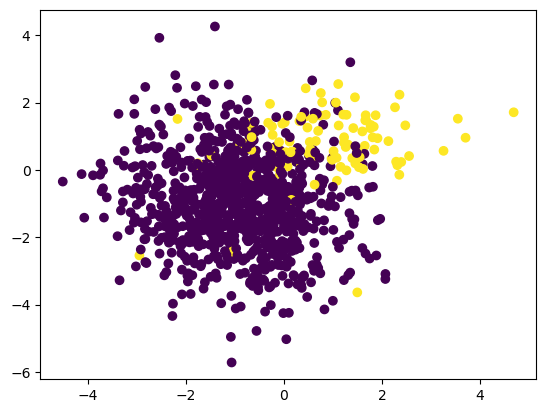

In [78]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'], final_df['f2'], c = final_df['target'])

In [ ]:
!pip install imblearn # install imblearn

In [ ]:
!pip install -U ipython jedi #down sugestion 

In [82]:
from imblearn.over_sampling import SMOTE 
over_sample = SMOTE()

In [83]:
x, y = over_sample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

In [84]:
x.shape

(1798, 2)

In [86]:
df1 = pd.DataFrame(x, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
smote_df = pd.concat([df1, df2], axis = 1)

In [88]:
smote_df

,f1,f2,target
0,0.629268,1.601999,0
1,-2.574253,-0.258698,0
2,-0.805682,-0.509493,0
3,-0.653972,-0.843804,0
4,-1.216053,-1.575339,0
...,...,...,...
1793,1.330294,0.351898,1
1794,2.615538,0.426160,1
1795,0.208933,1.507010,1
1796,-0.652943,0.747472,1


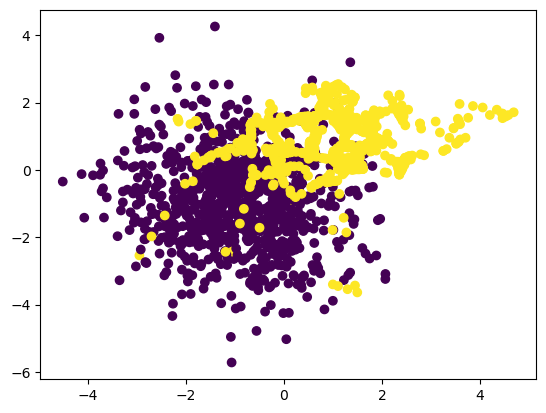

In [89]:
plt.scatter(smote_df['f1'], smote_df['f2'], c = smote_df['target'])